# SENTIMENTAL ANALYSIS ON FOOD REVIEW.CSV

# Import Basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense, Dropout,Embedding, SimpleRNN,GRU
from tensorflow.keras.models import Sequential

In [3]:
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

# Reading data

In [7]:
df=pd.read_csv("food_review.csv")

In [8]:
df.shape

(40500, 3)

In [9]:
df.head()

,Unnamed: 0,Text,Score
0,0,I bought these from a large chain pet store. a...,1
1,1,"This soup is incredibly good! But honestly, I...",5
2,2,Our family loves these tasty and healthy sesam...,5
3,3,The local auto shop offers this free to it cus...,4
4,4,I brought 2 bottles. One I carry in my pocket...,5


In [10]:
#removing unwanted columns
df=df.drop('Unnamed: 0',axis=1)

In [11]:
df.head()

,Text,Score
0,I bought these from a large chain pet store. a...,1
1,"This soup is incredibly good! But honestly, I...",5
2,Our family loves these tasty and healthy sesam...,5
3,The local auto shop offers this free to it cus...,4
4,I brought 2 bottles. One I carry in my pocket...,5


In [12]:
df.Score.value_counts()

4    8117
5    8106
3    8103
2    8095
1    8079
Name: Score, dtype: int64

# representing data in wordcloud form

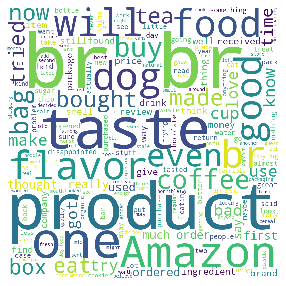

In [13]:
wc=WordCloud(width=800 , height=800 , background_color='white' , min_font_size=10)
wc.generate(''.join(df[df['Score']==1]['Text']))
plt.figure(figsize=(5,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

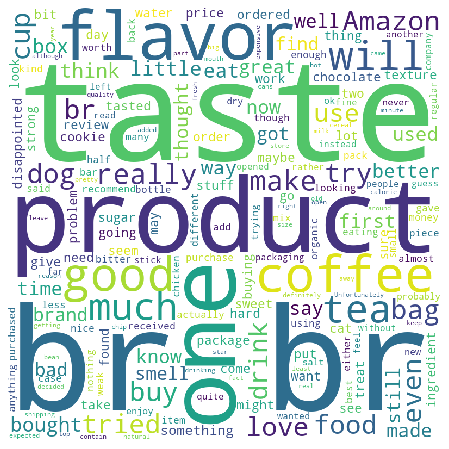

In [14]:

wc2=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc2.generate(''.join(df[df['Score']==2]['Text']))
plt.figure(figsize=(8,8))
plt.imshow(wc2)
plt.axis('off')
plt.show()

In [15]:
#finding out the counts of values
df.Score.value_counts()

4    8117
5    8106
3    8103
2    8095
1    8079
Name: Score, dtype: int64

In [16]:
le=LabelEncoder()
df['Score']=le.fit_transform(df['Score'])

In [17]:
df.Score.value_counts()

3    8117
4    8106
2    8103
1    8095
0    8079
Name: Score, dtype: int64

In [18]:
#spliting the data in training and testing set
df_train,df_test=train_test_split(df,test_size=0.2,random_state=2)

In [19]:
x_train=df_train['Text']
y_train=df_train['Score']
x_test=df_test['Text']
y_test=df_test['Score']

In [20]:
#FInding the length of sentences
sent_lens=[]
for sent in df_train['Text']:
    sent_lens.append(len(word_tokenize(sent)))
df_train['sent_len'] = sent_lens
df_train.head()

C:\Users\admin\anaconda3.1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Text,Score,sent_len
572,"If you don't love ginger (real ginger, not the...",3,72
17010,"Taste: OK, Calorie content: good, Protein co...",1,53
35365,"This tea brews very easily in my <a href=""http...",3,71
19002,Dog treats. What do you do with dog treats? We...,3,264
34155,"The tomato flavor is inferior, the taste is ex...",0,105


In [21]:
#maximum length of sentences
max(sent_lens)

2173

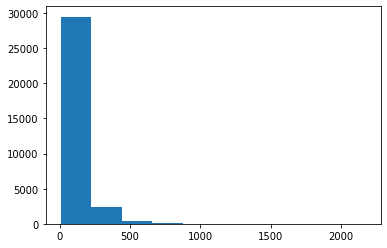

In [22]:
#graphical representation of length of sentences
plt.hist(sent_lens)
plt.show()

In [23]:
#95% quantile of sentences length
np.quantile(sent_lens,0.95)

285.0

In [24]:
#95% review is under  285 so we will take maximum length 285

In [25]:
max_len=285

In [26]:
tok = Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [27]:
tok.index_word

{1: 'the',
 2: 'i',
 3: 'a',
 4: 'and',
 5: 'to',
 6: 'it',
 7: 'of',
 8: 'is',
 9: 'br',
 10: 'this',
 11: 'in',
 12: 'for',
 13: 'that',
 14: 'but',
 15: 'not',
 16: 'my',
 17: 'was',
 18: 'with',
 19: 'have',
 20: 'you',
 21: 'are',
 22: 'they',
 23: 'like',
 24: 'as',
 25: 'on',
 26: 'so',
 27: 'these',
 28: 'be',
 29: 'taste',
 30: 'them',
 31: 'good',
 32: 'if',
 33: 'product',
 34: 'just',
 35: 'or',
 36: 'one',
 37: 'at',
 38: 'coffee',
 39: 'very',
 40: 'flavor',
 41: 'all',
 42: 'would',
 43: 'from',
 44: 'had',
 45: "it's",
 46: 'more',
 47: 'me',
 48: 'can',
 49: 'when',
 50: 'will',
 51: 'out',
 52: 'has',
 53: 'than',
 54: 'tea',
 55: 'no',
 56: 'other',
 57: 'food',
 58: 'great',
 59: 'get',
 60: 'we',
 61: 'really',
 62: 'up',
 63: "don't",
 64: 'some',
 65: 'much',
 66: 'were',
 67: 'about',
 68: 'too',
 69: 'only',
 70: 'there',
 71: 'because',
 72: 'an',
 73: 'what',
 74: 'amazon',
 75: 'which',
 76: 'do',
 77: 'your',
 78: 'love',
 79: 'little',
 80: 'buy',
 81: 'ev

In [28]:
vocab_len=len(tok.index_word)

In [29]:
vocab_len

36848

In [30]:
sequences_train = tok.texts_to_sequences(x_train)

In [31]:
sequences_train

[[32,
  20,
  63,
  78,
  311,
  271,
  311,
  15,
  1,
  3545,
  10194,
  7,
  311,
  11,
  311,
  2652,
  20,
  292,
  23,
  10,
  714,
  32,
  20,
  21,
  3,
  311,
  458,
  20,
  50,
  250,
  6,
  311,
  140,
  19,
  9506,
  2616,
  3107,
  11,
  781,
  6,
  8,
  2066,
  12,
  231,
  4665,
  43,
  5606,
  4252,
  4,
  4084,
  1013,
  313,
  3,
  91,
  12,
  1653,
  54,
  2340,
  4,
  311,
  2117],
 [29,
  370,
  672,
  674,
  31,
  366,
  674,
  446,
  100,
  3304,
  2,
  63,
  194,
  154,
  22,
  48,
  2980,
  1,
  430,
  7,
  27,
  347,
  2,
  17,
  643,
  132,
  935,
  6731,
  14,
  22,
  21,
  227,
  39,
  3595,
  2,
  292,
  80,
  27,
  98],
 [10,
  54,
  2253,
  39,
  574,
  11,
  16,
  3,
  416,
  407,
  404,
  74,
  315,
  411,
  33,
  21424,
  13895,
  21425,
  21426,
  102,
  122,
  102,
  3885,
  820,
  54,
  905,
  352,
  3,
  54,
  905,
  1,
  619,
  8,
  178,
  4,
  1,
  40,
  8,
  31,
  1,
  1729,
  290,
  16,
  242,
  40,
  7,
  54,
  14,
  261,
  34,
  16,
  1207,


In [32]:
sequences_matrix_train=sequence.pad_sequences(sequences_train,maxlen=max_len)

In [33]:
y_train

572      3
17010    1
35365    3
19002    3
34155    0
        ..
31019    0
30280    4
6637     3
35343    4
23720    3
Name: Score, Length: 32400, dtype: int64

In [34]:
sequences_matrix_train

array([[   0,    0,    0, ...,    4,  311, 2117],
       [   0,    0,    0, ...,   80,   27,   98],
       [   0,    0,    0, ...,  629, 3420,   31],
       ...,
       [   0,    0,    0, ...,    2,  250,    6],
       [   0,    0,    0, ...,   16,  428,  503],
       [   0,    0,    0, ...,  113,  175,  716]])

In [35]:
sequences_matrix_train[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [36]:
sequences_matrix_test=sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [37]:
sequences_matrix_test

array([[   0,    0,    0, ...,   22,   21, 1189],
       [   0,    0,    0, ..., 2121,   10,  295],
       [   0,    0,    0, ...,  173,    2,  250],
       ...,
       [   0,    0,    0, ...,   99,  313,    6],
       [   0,    0,    0, ...,    5, 7620,   30],
       [   0,    0,    0, ...,  561,    5,   47]])

# Sentimental analysis by using Simple RNN

In [38]:
model=Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(SimpleRNN(32,activation='tanh'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))
model.summary()
          

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 285, 500)          18424500  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                17056     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 18,442,777
Trainable params: 18,442,777
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="sgd")

In [40]:
model.fit(sequences_matrix_train,y_train.values,batch_size=10,epochs=10)

Epoch 1/10
3240/3240 [==============================] - 332s 103ms/step - loss: 1.6114
Epoch 2/10
3240/3240 [==============================] - 331s 102ms/step - loss: 1.6057
Epoch 3/10
3240/3240 [==============================] - 319s 99ms/step - loss: 1.5970
Epoch 4/10
3240/3240 [==============================] - 331s 102ms/step - loss: 1.5651
Epoch 5/10
3240/3240 [==============================] - 332s 103ms/step - loss: 1.5166
Epoch 6/10
3240/3240 [==============================] - 333s 103ms/step - loss: 1.5182
Epoch 7/10
3240/3240 [==============================] - 334s 103ms/step - loss: 1.4623
Epoch 8/10
3240/3240 [==============================] - 333s 103ms/step - loss: 1.4298
Epoch 9/10
3240/3240 [==============================] - 338s 104ms/step - loss: 1.4514
Epoch 10/10
3240/3240 [==============================] - 337s 104ms/step - loss: 1.3833


In [41]:
y_pred=model.predict(sequences_matrix_test)

In [42]:
y_pred

array([[0.03448142, 0.06176381, 0.11380563, 0.38691247, 0.40303665],
       [0.26206964, 0.14117801, 0.2034112 , 0.20867829, 0.18466282],
       [0.03083027, 0.06258629, 0.1060122 , 0.35900354, 0.44156763],
       ...,
       [0.01687068, 0.02690609, 0.06894535, 0.30051836, 0.5867595 ],
       [0.06147033, 0.10018273, 0.15393278, 0.2619538 , 0.42246038],
       [0.25376734, 0.26830956, 0.2686794 , 0.13859423, 0.07064942]],
      dtype=float32)

In [43]:
y_pred=y_pred.argmax(axis=1)

In [44]:
y_pred

array([4, 0, 4, ..., 4, 4, 2], dtype=int64)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.18      0.27      1597
           1       0.39      0.09      0.14      1605
           2       0.24      0.06      0.10      1690
           3       0.16      0.21      0.18      1579
           4       0.30      0.87      0.44      1629

    accuracy                           0.28      8100
   macro avg       0.33      0.28      0.23      8100
weighted avg       0.32      0.28      0.22      8100



# senitmental Analysis by using LSTM 

In [47]:
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(LSTM(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 285, 500)          18424500  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                17056     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
_________________________________________________________________
embedding_1 (Embedding)      (None, 5, 500)            18424500  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                1

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="sgd")

In [49]:
model.fit(sequences_matrix_train,y_train.values,batch_size=20,epochs=10)

Epoch 1/10
1620/1620 [==============================] - 69s 43ms/step - loss: 1.6096
Epoch 2/10
1620/1620 [==============================] - 69s 42ms/step - loss: 1.6095
Epoch 3/10
1620/1620 [==============================] - 69s 43ms/step - loss: 1.6096
Epoch 4/10
1620/1620 [==============================] - 69s 42ms/step - loss: 1.6095
Epoch 5/10
1620/1620 [==============================] - 68s 42ms/step - loss: 1.6096
Epoch 6/10
1620/1620 [==============================] - 70s 43ms/step - loss: 1.6096
Epoch 7/10
1620/1620 [==============================] - 69s 43ms/step - loss: 1.6096
Epoch 8/10
1620/1620 [==============================] - 70s 43ms/step - loss: 1.6096
Epoch 9/10
1620/1620 [==============================] - 71s 44ms/step - loss: 1.6096
Epoch 10/10
1620/1620 [==============================] - 71s 44ms/step - loss: 1.6096


In [50]:
y_pred=model.predict(sequences_matrix_test)

In [51]:
y_pred

array([[0.19783759, 0.19733322, 0.19770834, 0.20262422, 0.2044967 ],
       [0.19783759, 0.19733322, 0.19770834, 0.20262422, 0.2044967 ],
       [0.19783759, 0.19733322, 0.19770834, 0.20262422, 0.2044967 ],
       ...,
       [0.19783759, 0.19733322, 0.19770834, 0.20262422, 0.2044967 ],
       [0.19783759, 0.19733322, 0.19770834, 0.20262422, 0.2044967 ],
       [0.19783759, 0.19733322, 0.19770834, 0.20262422, 0.2044967 ]],
      dtype=float32)

In [52]:
y_pred=y_pred.argmax(axis=1)

In [53]:
y_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1597
           1       0.00      0.00      0.00      1605
           2       0.00      0.00      0.00      1690
           3       0.00      0.00      0.00      1579
           4       0.20      1.00      0.33      1629

    accuracy                           0.20      8100
   macro avg       0.04      0.20      0.07      8100
weighted avg       0.04      0.20      0.07      8100



C:\Users\admin\anaconda3.1\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Sentimental analysis by using GRU

In [56]:
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
model.add(GRU(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 285, 500)          18424500  
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                17056     
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
_________________________________________________________________
embedding_1 (Embedding)      (None, 5, 500)            18424500  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                1

In [57]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="sgd")

In [58]:
model.fit(sequences_matrix_train,y_train.values,batch_size=20,epochs=10)

Epoch 1/10
1620/1620 [==============================] - 68s 42ms/step - loss: 1.6096
Epoch 2/10
1620/1620 [==============================] - 67s 41ms/step - loss: 1.6096
Epoch 3/10
1620/1620 [==============================] - 67s 41ms/step - loss: 1.6096
Epoch 4/10
1620/1620 [==============================] - 67s 41ms/step - loss: 1.6096
Epoch 5/10
1620/1620 [==============================] - 68s 42ms/step - loss: 1.6096
Epoch 6/10
1620/1620 [==============================] - 68s 42ms/step - loss: 1.6095
Epoch 7/10
1620/1620 [==============================] - 70s 43ms/step - loss: 1.6096
Epoch 8/10
1620/1620 [==============================] - 69s 42ms/step - loss: 1.6096
Epoch 9/10
1620/1620 [==============================] - 70s 43ms/step - loss: 1.6096
Epoch 10/10
1620/1620 [==============================] - 72s 44ms/step - loss: 1.6096


In [59]:
y_pred=model.predict(sequences_matrix_test)

In [60]:
y_pred

array([[0.1998562 , 0.20563659, 0.19643664, 0.19889723, 0.19917342],
       [0.1998562 , 0.20563659, 0.19643664, 0.19889723, 0.19917342],
       [0.1998562 , 0.20563659, 0.19643664, 0.19889723, 0.19917342],
       ...,
       [0.1998562 , 0.20563659, 0.19643664, 0.19889723, 0.19917342],
       [0.1998562 , 0.20563659, 0.19643664, 0.19889723, 0.19917342],
       [0.1998562 , 0.20563659, 0.19643664, 0.19889723, 0.19917342]],
      dtype=float32)

In [61]:
y_pred=y_pred.argmax(axis=1)

In [62]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1597
           1       0.20      1.00      0.33      1605
           2       0.00      0.00      0.00      1690
           3       0.00      0.00      0.00      1579
           4       0.00      0.00      0.00      1629

    accuracy                           0.20      8100
   macro avg       0.04      0.20      0.07      8100
weighted avg       0.04      0.20      0.07      8100

